### Exploratory Data Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
df_train = pd.read_csv("data/df_train.csv")

df_test = pd.read_csv("data/df_test.csv")

df = pd.concat([df_train,df_test], axis=0)
df.head()

df_train = df.copy()

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26425 entries, 0 to 5285
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     26425 non-null  int64  
 1   horse_number           26425 non-null  float64
 2   horse_name             26425 non-null  object 
 3   horse_id               26425 non-null  object 
 4   jockey                 26425 non-null  object 
 5   trainer                26425 non-null  object 
 6   actual_weight          26425 non-null  int64  
 7   declared_horse_weight  26425 non-null  int64  
 8   draw                   26425 non-null  int64  
 9   length_behind_winner   26425 non-null  object 
 10  running_position_1     26425 non-null  float64
 11  running_position_2     26425 non-null  float64
 12  running_position_3     26425 non-null  float64
 13  running_position_4     14907 non-null  float64
 14  finish_time            26425 non-null  object 
 15  win

In [11]:
df.columns.tolist()

['finishing_position',
 'horse_number',
 'horse_name',
 'horse_id',
 'jockey',
 'trainer',
 'actual_weight',
 'declared_horse_weight',
 'draw',
 'length_behind_winner',
 'running_position_1',
 'running_position_2',
 'running_position_3',
 'running_position_4',
 'finish_time',
 'win_odds',
 'running_position_5',
 'running_position_6',
 'race_id',
 'recent_6_runs',
 'recent_ave_rank',
 'race_distance',
 'HorseWin',
 'HorseRankTop3',
 'HorseRankTop50Percent',
 'jockey_ave_rank',
 'trainer_ave_rank']

<Figure size 1200x800 with 0 Axes>

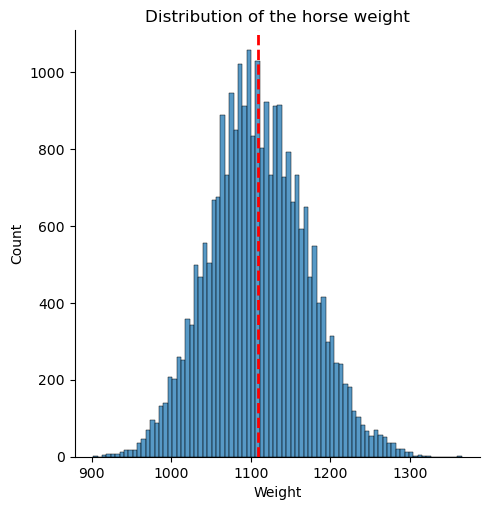

In [34]:
# Draw the mean of a horse weight on same plot
plt.figure(figsize=(12,8))
sns.displot(df_train["declared_horse_weight"], kde=False)
plt.title("Distribution of the horse weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.axvline(df_train["declared_horse_weight"].mean(), color= "r", linestyle = "dashed", linewidth=2)

plt.show()

In [21]:
numHorsePerRace = df_train.groupby('race_id')["horse_id"].count().value_counts()

Text(0.5, 1.0, 'Distribution of Number of Horses per Race')

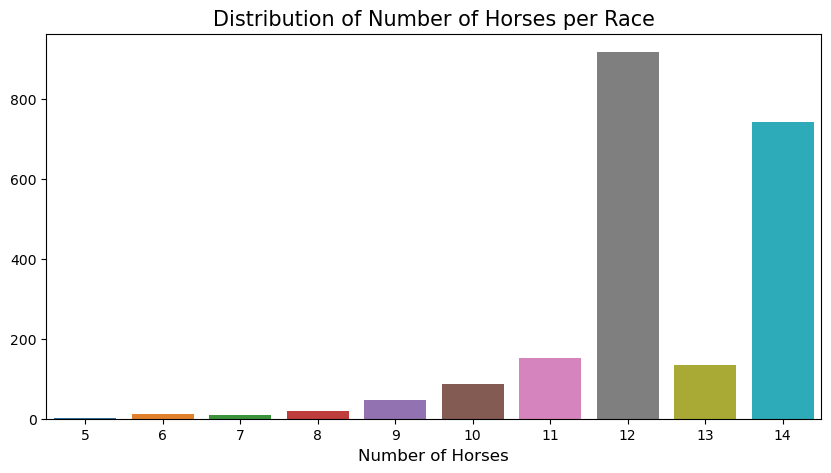

In [22]:
# Plot of distribution of the number of horses in perticular race
plt.figure(figsize=(10,5))
sns.barplot(x=numHorsePerRace.index,y=numHorsePerRace.values)
plt.xlabel("Number of Horses", fontsize = 12)
plt.ylabel

plt.title("Distribution of Number of Horses per Race", fontsize=15)

Text(0.5, 1.0, 'Recent Average Rank vs Win Odds')

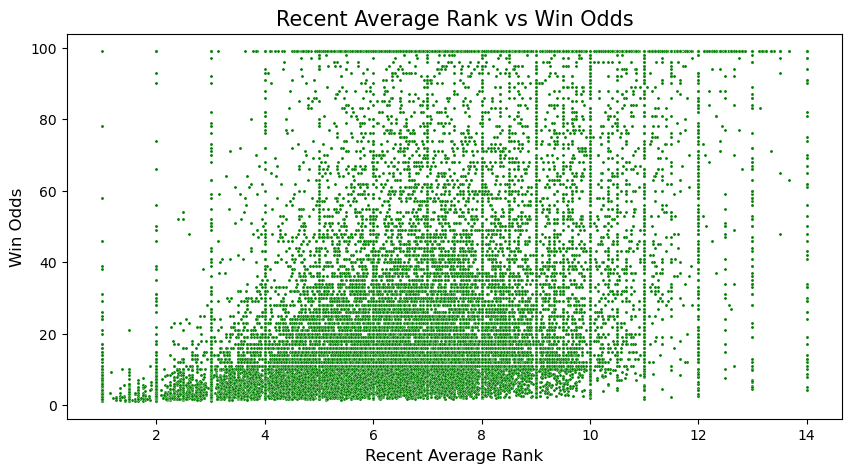

In [23]:
# plot recent average rank against win_odds
plt.figure(figsize=(10, 5))
sns.scatterplot(x='recent_ave_rank', y='win_odds', data=df_train, s=5, color='g')
plt.xlabel('Recent Average Rank', fontsize=12)
plt.ylabel('Win Odds', fontsize=12)
plt.title('Recent Average Rank vs Win Odds', fontsize=15)


Text(0.5, 1.0, 'Mean Win Odds against Finishing Position')

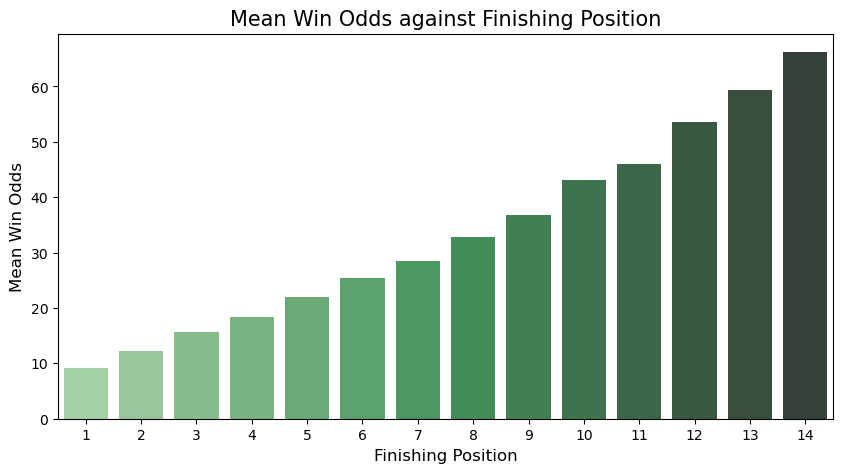

In [24]:
# Plot mean of win odds against finishings
plt.figure(figsize=(10, 5))
sns.barplot(x=df_train['finishing_position'].unique(), y=df_train.groupby('finishing_position')['win_odds'].mean(), palette='Greens_d')
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Win Odds', fontsize=12)
plt.title('Mean Win Odds against Finishing Position', fontsize=15)

Text(0.5, 1.0, 'Distribution of Actual Weight against Win Odds')

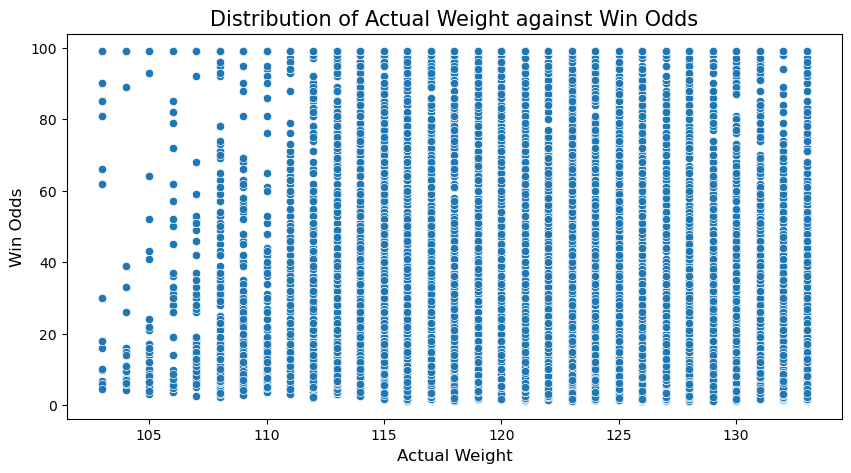

In [25]:
# Plot distribution of actual weight against win odds
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='win_odds', data=df_train)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Win Odds', fontsize=12)
plt.title('Distribution of Actual Weight against Win Odds', fontsize=15)


Text(0.5, 1.0, 'Distribution of Actual Weight against Horse Number')

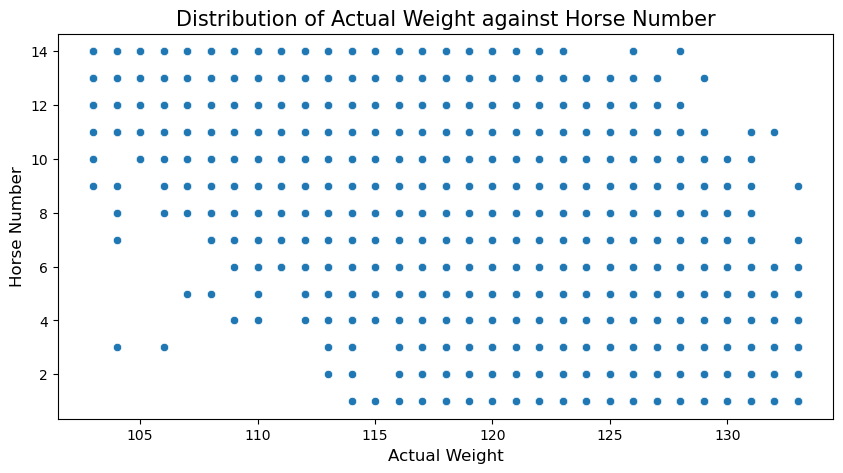

In [26]:
# Plot distribution of actual weight against horse number
plt.figure(figsize=(10, 5))
sns.scatterplot(x='actual_weight', y='horse_number', data=df_train)
plt.xlabel('Actual Weight', fontsize=12)
plt.ylabel('Horse Number', fontsize=12)
plt.title('Distribution of Actual Weight against Horse Number', fontsize=15)


Hong Kong horse racing uses the handicap system. Horse number #1 has the highest rating and carry the heaviest weight.

Text(0.5, 1.0, 'Distribution of Mean Actual Weight for Each Horse Number')

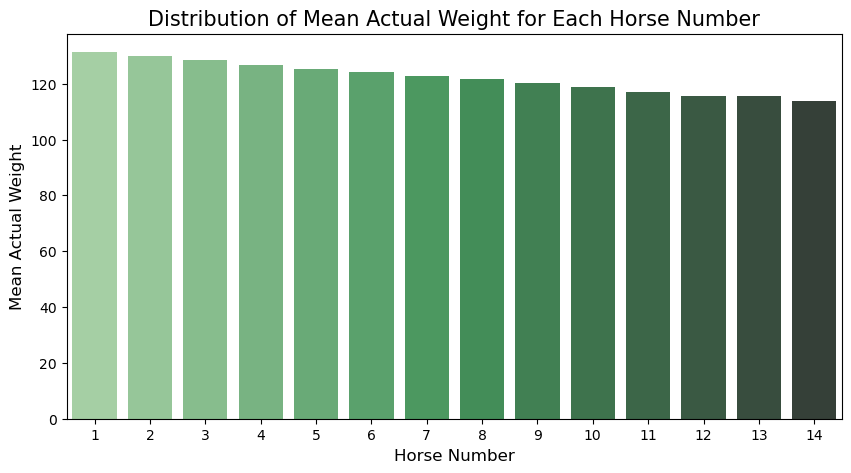

In [27]:
# Find the mean of actual weight for each horse number
meanWtPerHorse = df_train.groupby('horse_number')['actual_weight'].mean()

# Plot the distribution of mean actual weight for each horse number
plt.figure(figsize=(10, 5))
sns.barplot(x=meanWtPerHorse.index.astype(int), y=meanWtPerHorse.values, palette='Greens_d')
plt.xlabel('Horse Number', fontsize=12)
plt.ylabel('Mean Actual Weight', fontsize=12)
plt.title('Distribution of Mean Actual Weight for Each Horse Number', fontsize=15)


Text(0.5, 1.0, 'Distribution of Finishing Position against Draw')

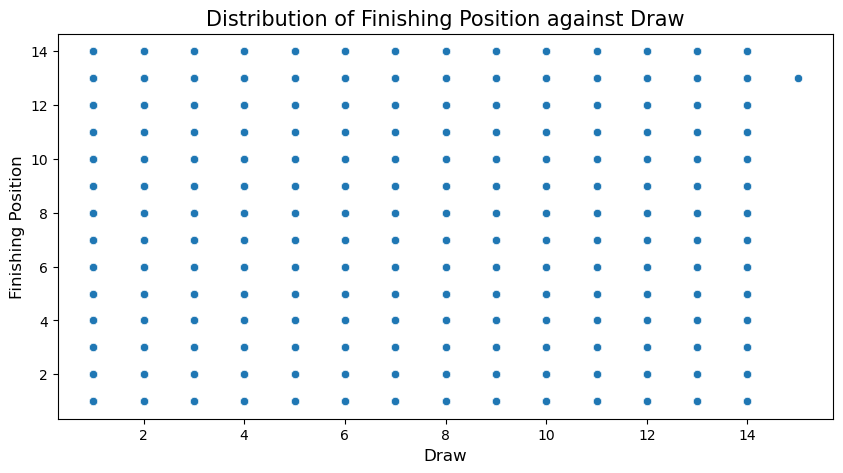

In [28]:
# Plot the distribution of finishing position against draw
plt.figure(figsize=(10, 5))
sns.scatterplot(x='draw', y='finishing_position', data=df_train)
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Finishing Position', fontsize=12)
plt.title('Distribution of Finishing Position against Draw', fontsize=15)


Text(0.5, 1.0, 'Distribution of Average Finishing Position against Draw')

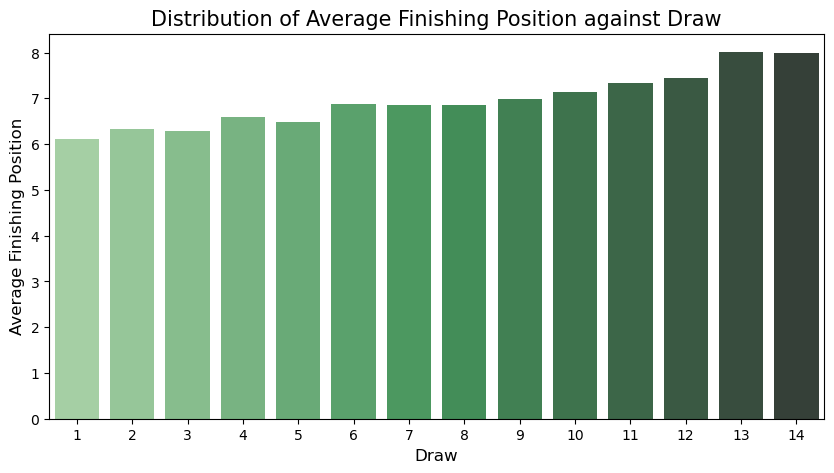

In [29]:
# Return only 14 columns. Draw #15 is not included.
avgPos_vs_Draw = df_train.groupby('draw')['finishing_position'].mean()[:14]

# Plot the distribution of average finishing position against draw
plt.figure(figsize=(10, 5))
sns.barplot(x=avgPos_vs_Draw.index, y=avgPos_vs_Draw.values, palette='Greens_d')
plt.xlabel('Draw', fontsize=12)
plt.ylabel('Average Finishing Position', fontsize=12)
plt.title('Distribution of Average Finishing Position against Draw', fontsize=15)


(1070.0, 1120.0)

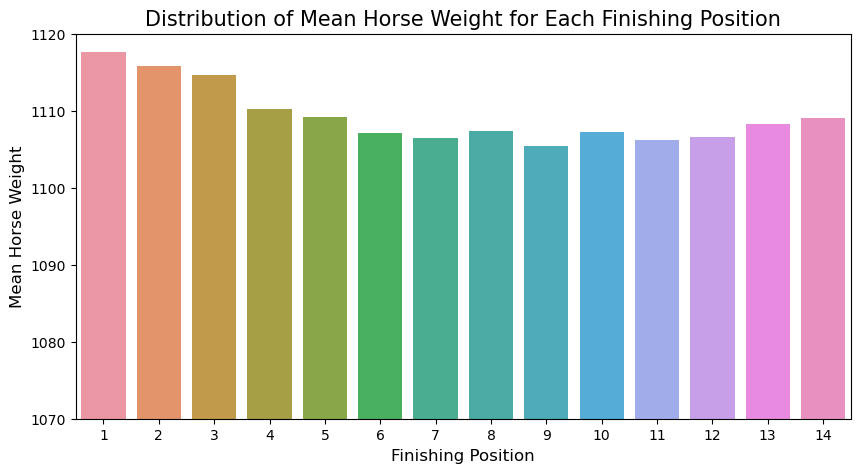

In [32]:
# Find the mean of horse weight for each position
meanHorseWtPerPos = df_train.groupby('finishing_position')['declared_horse_weight'].mean()

# Plot the distribution of mean horse weight for each position
plt.figure(figsize=(10, 5))
sns.barplot(x=meanHorseWtPerPos.index, y=meanHorseWtPerPos.values)
plt.xlabel('Finishing Position', fontsize=12)
plt.ylabel('Mean Horse Weight', fontsize=12)
plt.title('Distribution of Mean Horse Weight for Each Finishing Position', fontsize=15)

# Set y limit

plt.ylim(1070, 1120)

In [38]:
# view df_train
df_train.head()


,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,running_position_6,race_id,recent_6_runs,recent_ave_rank,race_distance,HorseWin,HorseRankTop3,HorseRankTop50Percent,jockey_ave_rank,trainer_ave_rank
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,NaN,2014-001,1,1.0,1400,1,1,1,6.058185,7.369681
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,NaN,2014-001,2,2.0,1400,0,1,1,5.795734,6.721234
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,NaN,2014-001,3,3.0,1400,0,1,1,7.857759,6.850174
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,...,NaN,2014-001,4,4.0,1400,0,0,1,4.173402,6.631579
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,...,NaN,2014-001,5,5.0,1400,0,0,1,5.343498,6.846633
